Hola **Emanuel**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
--
</div>

# Optimización de gastos de marketing.

In [1]:
# Importamos las librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Cargamos los datos
visits_data = pd.read_csv('visits_log_us.csv')
orders_data = pd.read_csv('orders_log_us.csv')
costs_data = pd.read_csv('costs_us.csv')

In [3]:
# Visualizamos las primeras filas de cada DataFrame
print("Visitas Data:")
print(visits_data.head())
print("\nÓrdenes Data:")
print(orders_data.head())

Visitas Data:
    Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  

Órdenes Data:
                Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450


In [4]:
print("Costos Data:")
print(costs_data.head())

Costos Data:
   source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08


In [5]:
# Exploramos la información de los DataFrames
print("\nInformación de Visitas Data:")
print(visits_data.info())
print("\nInformación de Órdenes Data:")
print(orders_data.info())


Información de Visitas Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None

Información de Órdenes Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None


In [6]:
print("\nInformación de Costos Data:")
print(costs_data.info())


Información de Costos Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None


### Cambiamos el nombre de las columnas

In [7]:
# Aseguramos que los nombres de las columnas sean correctos
new_columns_visits = {'Device': 'device',
                     'End Ts': 'end_ts',
                     'Source Id': 'source_id',
                     'Start Ts': 'start_ts',
                     'Uid': 'uid'}
visits_data = visits_data.rename(columns=new_columns_visits)


new_columns_orders = {'Buy Ts': 'buy_ts',
                     'Revenue': 'revenue',
                     'Uid': 'uid'}
orders_data = orders_data.rename(columns=new_columns_orders)

### Convertimos los datos a su tipo adecuado 

In [8]:
# Aseguramos que las columnas de los DataFrames estén en el formato correcto

# Visits
visits_data['device'] = visits_data['device'].astype('category')
visits_data['source_id'] = visits_data['source_id'].astype('str')
visits_data['uid'] = visits_data['uid'].astype('str')
visits_data['end_ts'] = pd.to_datetime(visits_data['end_ts'])
visits_data['start_ts'] = pd.to_datetime(visits_data['start_ts'])

# Orders
orders_data['buy_ts'] = pd.to_datetime(orders_data['buy_ts'])
orders_data['uid'] = orders_data['uid'].astype('str')

# Costs
costs_data['dt'] = pd.to_datetime(costs_data['dt'])
costs_data['source_id'] = costs_data['source_id'].astype('str')

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con el análisis inicial de tus dataset, siempre es importante primero revisar la calidad de los datos y el tipo de los mismos antes de pasar a cualquier análisis
</div>

# Visitas
### ¿Cuántas personas lo usan cada día, semana y mes?

In [9]:
# Anadimos colummnas adicionales para facilitar el análisis de actividad de usuarios
visits_data['visits_year'] = visits_data['start_ts'].dt.isocalendar().year
visits_data['visits_month'] = visits_data['start_ts'].dt.to_period('M')
visits_data['visits_week'] = visits_data['start_ts'].dt.isocalendar().week
visits_data['session_date'] = visits_data['start_ts'].dt.date

# Agrupamos los datos por día y contamos los usuarios únicos
Dau_total = visits_data.groupby('session_date').agg({'uid': 'nunique'}).mean()

# Agrupamos los datos por semana y contamos los usuarios únicos
Wau_total = visits_data.groupby(['visits_year', 'visits_week']).agg({'uid': 'nunique'}).mean()

# Agrupamos los datos por mes y contamos los usuarios únicos
Mau_total = visits_data.groupby(['visits_year', 'visits_month']).agg({'uid': 'nunique'}).mean()

# Imprimimos los resultados
print(f"Cantidad de usuarios únicos que lo usan por día: {int(Dau_total)}")
print(f"\nCantidad de usuarios únicos que lo usan por semana: {int(Wau_total)}")
print(f"\nCantidad de usuarios únicos que lo usan por mes: {int(Mau_total)}")

Cantidad de usuarios únicos que lo usan por día: 907

Cantidad de usuarios únicos que lo usan por semana: 5716

Cantidad de usuarios únicos que lo usan por mes: 23228


<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

El cálculo es correcto! Pero, también se podría complementar esta parte del análisis con una gráfica ya que al tener datos por tiempo puedes mostrarlo en una gráfica de líneas y así poder identificar si existen tendencias
</div>

### ¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).

In [10]:
# Agrupamos los datos por día de sesión y contamos las sesiones y usuarios únicos
session_per_user = visits_data.groupby('session_date').agg({'uid': ['count', 'nunique']})
session_per_user.columns = ['Total Sessions', 'Unique Users']
# Calculamos las sesiones de los usuarios por día
session_per_user['sessions per user'] = (session_per_user['Total Sessions'] / session_per_user['Unique Users'])

# Imprimimos la cantidad de sesiones por día
print("\nCantidad de sesiones por día:")
session_per_user.head()


Cantidad de sesiones por día:


,Total Sessions,Unique Users,sessions per user
session_date,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024


**¿Cuántas sesiones hay por día? Gracias a lo que observamos en la tabla, podemos ver que cada usuario ingresa una sola vez al día.**

### ¿Cuántas sesiones hay en distintos dispositivos? 

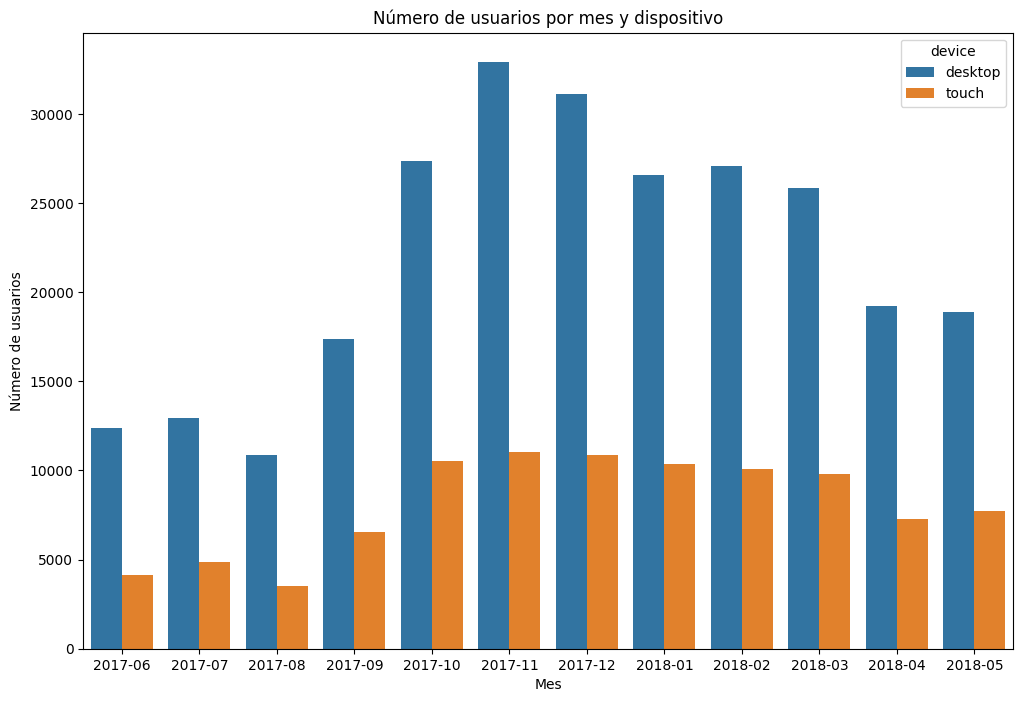

In [11]:
# Agrupamos los datos por mes y contamos los usuarios 
group_device = visits_data.groupby(['visits_month', 'device'])['uid'].count().reset_index()

# Establecemos el tamaño de la figura
plt.figure(figsize=(12, 8))

# Creamos el gráfico de barras
sns.barplot(data=group_device, x='visits_month', y='uid', hue='device')

# Ajustamos el gráfico
plt.title('Número de usuarios por mes y dispositivo')
plt.xlabel('Mes')
plt.ylabel('Número de usuarios')

# Mostramos el gráfico
plt.show()

### ¿Cuál es la duración de cada sesión?

In [12]:
# Calculamos la duración de cada sesión en segundos
visits_data['session_duration_sec'] = (visits_data['end_ts'] - visits_data['start_ts']).dt.seconds

# Calculamos la duración media de la sesión
asl = visits_data['session_duration_sec'].mode()

# Imprimimos la duración media de la sesión
print(f"\nLa duración media de la sesión de usuarios es de: {asl.loc[0]} segundos")


La duración media de la sesión de usuarios es de: 60 segundos


### ¿Con qué frecuencia los usuarios regresan?

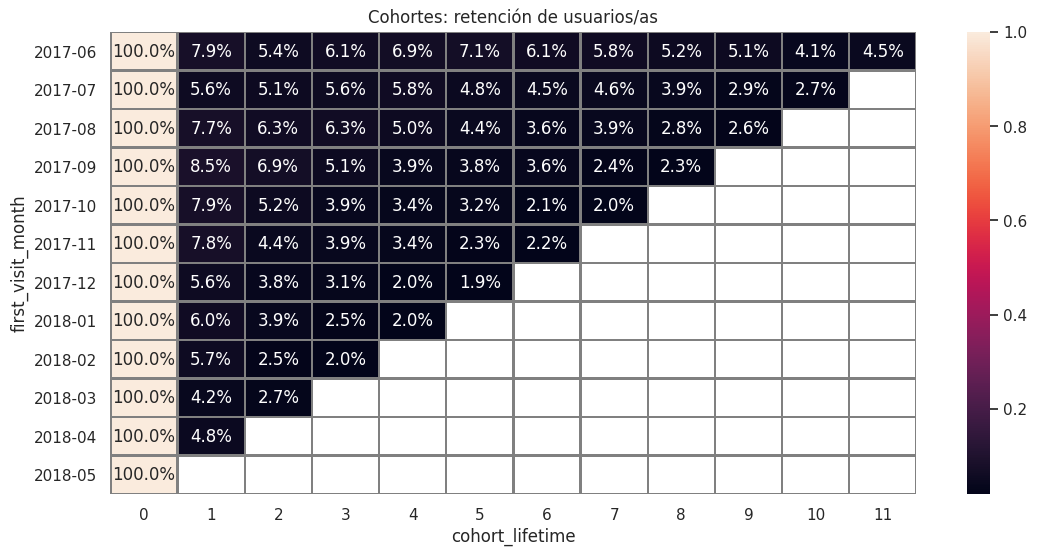

In [13]:
# Obtenemos el mes de la primera visita de cada usuario
first_visit_month = visits_data.groupby('uid')['visits_month'].min()
first_visit_month.name = 'first_visit_month'

# Unimos la serie de la primera visita al DataFrame original
visits_data = visits_data.join(first_visit_month, on='uid')

# Creamos la columna de tiempo de vida de la cohorte
visits_data['cohort_lifetime'] = (visits_data['visits_month'] - visits_data['first_visit_month']).apply(lambda x: x.n)

# Agrupamos los datos por mes de la primera visita y el tiempo de vida de la cohorte
cohorts = visits_data.groupby(['first_visit_month', 'cohort_lifetime'])['uid'].nunique().reset_index()

# Obtenemos el conteo de usuarios iniciales por cohorte
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0 ][['first_visit_month', 'uid']]
initial_users_count = initial_users_count.rename(columns={'uid': 'cohort_users'})

# Unimos el conteo de usuarios iniciales al DataFrame de cohortes
cohorts = cohorts.merge(initial_users_count, on='first_visit_month')

# Calculamos la retención de usuarios
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']

# Creamos la tabla de retención
retention_pivot = cohorts.pivot_table(index='first_visit_month',
                                      columns='cohort_lifetime',
                                      values='retention',
                                      aggfunc='sum')

# Ajustamos el titulo y el formato del gráfico
sns.set(style='whitegrid')
plt.figure(figsize=(13, 6))
plt.title('Cohortes: retención de usuarios/as')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray')

# Mostramos el gráfico
plt.show()

**¿Con qué frecuencia regresan los usuarios? Al observar la información del gráfico de calor, vemos que la tasa de retención de usuarios es demasiado baja, ya que en el mes siguiente al inicio de cada cohorte, la tasa de retención disminuye considerablemente.**

# Ventas 
### ¿Cuándo empieza la gente a comprar?


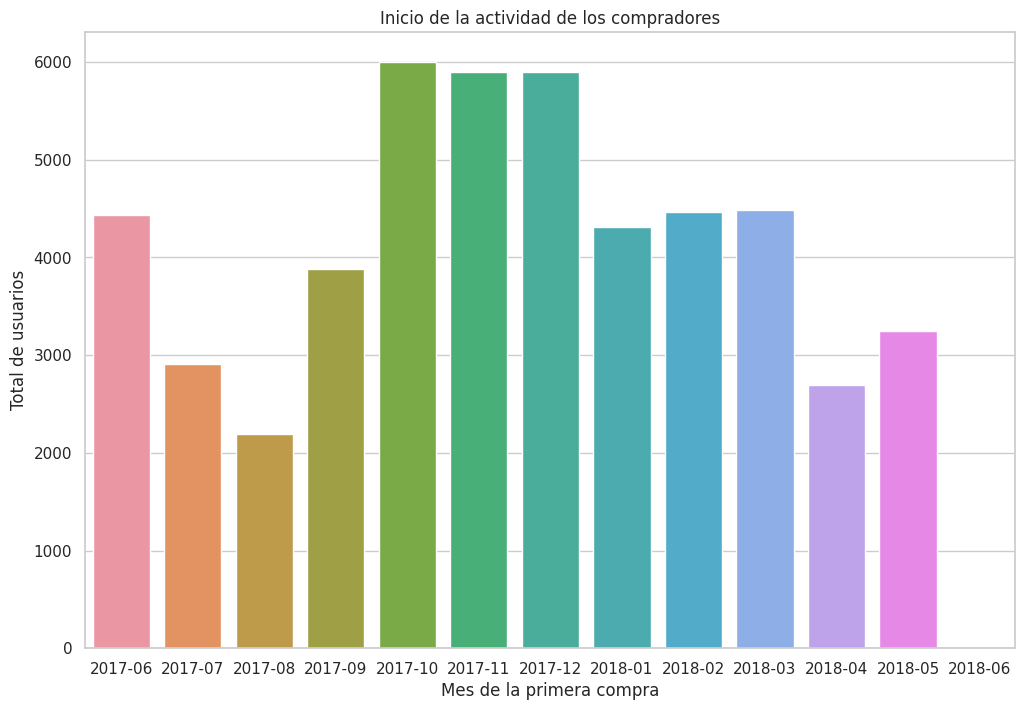

In [14]:
# Obtenemos el la fecha de la primera compra de cada usuario
first_order_month = orders_data.groupby('uid')['buy_ts'].min()
first_order_month.name = 'first_order_month'

# Unimos el la fecha de la primera compra de cada usuario

orders_data = orders_data.join(first_order_month, on='uid')

# Obtenemos el mes de la primera compra de cada usuario
orders_data['first_order_month'] = orders_data['first_order_month'].dt.to_period('M')

# Calculamos el total de pedidos para cada mes
group_order = orders_data.groupby('first_order_month')['uid'].count().reset_index()

# Establecemos el tamaño del grafico
plt.figure(figsize=(12, 8))

# Creamos el gráfico de barras
sns.barplot(data=group_order,
            x='first_order_month',
            y='uid')

# Ajustamos el gráfico
plt.title('Inicio de la actividad de los compradores')
plt.xlabel('Mes de la primera compra')
plt.ylabel('Total de usuarios')

# Mostramos el gráfico de barras
plt.show()

**¿Cuándo comienza la gente a comprar? Según la información que muestra el gráfico, podemos observar que el mes en el que más personas compran es Octubre.**

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Perfecto! Esta última sección te apoyaste muy bien de las gráficas para complementar mejor el mensaje que se quiere compartir en el análisis.
</div>

### ¿Cuántos pedidos hacen durante un período de tiempo dado?

In [15]:
# Obtenemos el mes de los pedidos 
orders_data['order_month'] = orders_data['buy_ts'].dt.to_period('M')

# Filtramos por un periodo de tiempo entre Junio y Diciembre de 2017
orders_filtered = orders_data[(orders_data['order_month'] >= '2017-06') & (orders_data['order_month'] <= '2017-12')]

# Calculamos el total de pedidos
total_orders = orders_filtered['uid'].count()

# Imprimimos el total de pedidos
print(f"Total de pedidos entre junio y diciembre de 2017: {total_orders}")

Total de pedidos entre junio y diciembre de 2017: 27467


### ¿Cuál es el tamaño promedio de compra?

In [16]:
# Agrupamos por mes y calculamos la suma de ingresos y el conteo total de usuarios
mean_orders = orders_data.groupby('order_month').agg({'revenue': 'sum', 'uid': 'count'})

# Calculamos la media de órdenes
mean_orders['mean_order'] = mean_orders['revenue'] / mean_orders['uid']

# Mostramos el resultado
mean_orders

,revenue,uid,mean_order
order_month,,,
2017-06,9557.49,2354,4.060106
2017-07,12539.47,2363,5.306589
2017-08,8758.78,1807,4.847139
2017-09,18345.51,3387,5.416448
2017-10,27987.70,5679,4.928280
2017-11,27069.93,5659,4.783518
2017-12,36388.60,6218,5.852139
2018-01,19417.13,4721,4.112927
2018-02,25560.54,5281,4.840095


**¿Cuál es el tamaño promedio de compra? Calculamos el tamaño promedio de compra para cada mes y, gracias a eso, observamos que el número promedio de pedidos por usuario varía entre 4 y 5.**

### ¿Cuánto dinero traen? (LTV)

In [17]:
# Extraemos el mes de los costos
costs_data['costs_month'] = costs_data['dt'].dt.to_period('M')

# Agrupamos por la primera fecha de compra de cada usuario único
cohort_size = orders_data.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_size.columns = ['first_order_month', 'n_buyers']

# Agrupamos por cohorte y mes
cohort = orders_data.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index()

# Unimos los datos de cohortes y tamaño de cohortes
report = cohort.merge(cohort_size, on='first_order_month')

# Calculamos la tasa de margen
margin_rate = ((sum(orders_data['revenue']) - sum(costs_data['costs'])) / sum(orders_data['revenue']))
margin_rate = round(margin_rate, 1)

# Calculamos la ganancia bruta
report['gp'] = report['revenue'] * margin_rate

# Calculamos la edad de la cohorte
report['age'] = (report['order_month'] - report['first_order_month']).apply(lambda x: x.n)

# Calculamos el LTV por cohorte
report['ltv'] = report['gp'] / report['n_buyers']

# Calculamos el total de ganancias
total_gp = report['gp'].sum()
# Calculamos el total de compradores
total_buyers = cohort_size['n_buyers'].sum()  
# Calculamos el LTV general
ltv_general = total_gp / total_buyers

# Imprimimos el LTV general 
ltv_general 


-2.0703983791035725

**¿Cuánto dinero traen? (LTV)
Al observar el resultado del LTV general, notamos que la empresa no genera ingresos a partir del ciclo de vida de los clientes, ya que, en este caso, está generando pérdidas.**

# Marketing
###  ¿Cuánto dinero se gastó?  (Total/por fuente de adquisición/a lo largo del tiempo) 

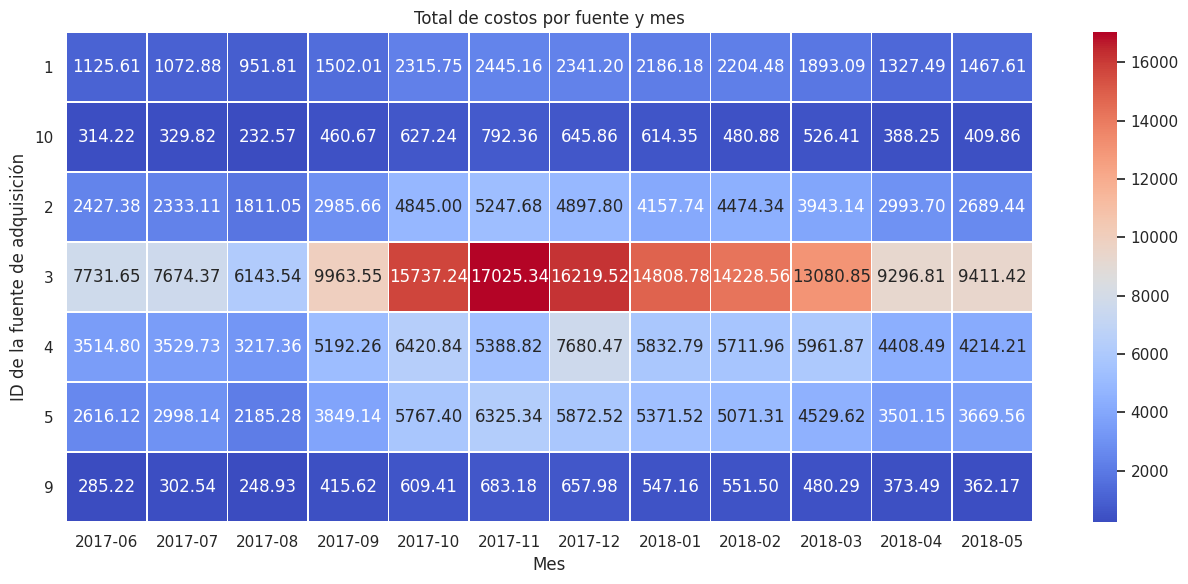

In [18]:
# Agrupamos los costos por fuente y mes 
group_prueba = costs_data.pivot_table(index='source_id', 
                                      columns='costs_month', 
                                      values='costs', 
                                      aggfunc='sum')

# Creamos el gráfico de calor
plt.figure(figsize=(13, 6))
sns.heatmap(data=group_prueba,
             annot=True,
             fmt='.2f',
             cmap='coolwarm',
             linewidths=0.5)

# Ajustamos el título y etiquetas
plt.title('Total de costos por fuente y mes')
plt.xlabel('Mes')
plt.ylabel('ID de la fuente de adquisición')
plt.yticks(rotation=0)
plt.tight_layout()

# Mostramos el gráfico
plt.show()

**¿Cuánto dinero se gastó? Al observar el gráfico de calor, notamos que solo unas pocas fuentes de anuncio generan más costos en comparación con las demás. Por ejemplo, la fuente con ID 3 acumula más de 7,000 dólares en gastos en cada mes del conjunto de datos. Esto podría indicar que se trata de una fuente importante en términos de captación. Sin embargo, al analizar el LTV, se observa que esta fuente podría estar utilizando demasiado presupuesto sin generar ingresos que realmente beneficien a la empresa.**

### ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

In [19]:
# Calculamos el total de compradores
users_source = visits_data.groupby('source_id')['uid'].nunique().reset_index()
users_source.columns = ['source_id', 'n_buyers']
# Calculamos el CAC por fuente
costs_source = costs_data.groupby('source_id')['costs'].sum().reset_index()

# Unimos los datos de usuarios y costos
cac_source = users_source.merge(costs_source, left_on='source_id', right_on='source_id', how='left')

# Calculamos el CAC por fuente
cac_source['cac'] = cac_source['costs'] / cac_source['n_buyers']

# Calculamos el total de costos
total_cost = cac_source['costs'].sum()
# Calculamos el total de compradores
total_nbuyers = cac_source['n_buyers'].sum()
# Calculamos el CAC general
cac_general = total_cost / total_nbuyers

# Ordenamos los datos por costos y eliminamos los nulos
cac_source.sort_values('costs', ascending=False)
cac_source = cac_source.dropna()

# Imprimimos el CAC por fuente
cac_source

,source_id,n_buyers,costs,cac
0,1,18999,20833.27,1.096546
1,10,8067,5822.49,0.721766
2,2,26245,42806.04,1.631017
3,3,74756,141321.63,1.890439
4,4,83525,61073.60,0.731201
5,5,56974,51757.10,0.908434
8,9,9264,5517.49,0.595584


**¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?
Gracias a la tabla que observamos, podemos ver que el costo de adquisición de clientes para cada fuente varía entre 0.5 y menos de 2 dólares por cliente.**

### ¿Cuán rentables eran las inversiones? (ROMI)

In [20]:
# Calculamos el ROMI general
# ROMI = (LTV - CAC) / CAC
romi_general = (ltv_general - cac_general) / cac_general

# Imprimimos el ROMI general
romi_general

-2.7479377934016482

**¿Cuán rentables eran las inversiones? (ROMI)
Al observar el resultado del ROMI general, nos damos cuenta de que las inversiones en marketing no están siendo rentables, ya que no están generando beneficios y, en cambio, están causando pérdidas. Esto indica que es necesario revisar y solucionar los problemas relacionados con las estrategias de marketing.**

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo hasta este punto! Calculaste muy bien las métricas de negocio y las explicas correctamente con las gráficas y tus comentarios lo cual deja claro el mensaje que se quiere compartir sin importar si la audiencia a la que expongas tus resultados sea técnica o no.
</div>

## ¿Qué fuentes/plataformas recomendarías?
**Recomendaría enfocarse en las plataformas donde se invierte más dinero, por ejemplo: las plataformas 3, 4, 5 y 2, ya que son las que reciben la mayor inversión. Debería priorizarse el enfoque en ellas y dejar de lado las plataformas con menor inversión, pues dispersan el presupuesto y afectan la efectividad de los anuncios.**

# Fundamenta tu selección: ¿en qué métricas te enfocaste? ¿Por qué?
**Primero, trabajé con el análisis de cohortes, que consiste en identificar la primera compra de cada usuario. A partir de ahí, puedes segmentar y analizar muchas cosas: cuánto dinero generaron en esa primera compra, cuántos usuarios llegaron ese mes, cuántos de ellos fueron únicos… en fin, te abre la puerta a muchos análisis.**

**También puedes ver, por ejemplo, en qué fechas se hacen más pedidos, si agrupas los pedidos desde esa primera compra de cada usuario. Así puedes detectar patrones importantes.**

**Después, pasé a calcular la tasa de retención, que nos dice qué tan seguido un usuario regresa después de su primera compra. Esto nos ayuda a saber si algo está fallando o si lo que ofrecemos realmente está haciendo que los clientes vuelvan.**

**También calculé el LTV (Lifetime Value), que es básicamente saber cuánto gana la empresa, en promedio, por cada usuario. Esto sirve para ver el valor real que aporta cada cliente a largo plazo.**

**Luego me enfoqué en el CAC (Costo de Adquisición de Cliente), para saber cuánto nos cuesta atraer a un nuevo cliente. Lo calculamos por fuente, para ver si nos está saliendo caro traer gente de ciertos canales o si hay fuentes que están funcionando mejor.**

**Y ya con esos datos, pasé a calcular el ROMI, que nos dice si el dinero que invertimos en marketing está rindiendo o si solo estamos perdiendo lana. Lo que hacemos aquí es comparar el LTV contra el CAC. Si el valor que aporta el cliente es mayor que lo que costó traerlo, vamos bien. Si no… hay que revisar qué está fallando.**

# ¿Qué conclusiones sacaste después de encontrar los valores métricos?
**Gracias a lo observado en las métricas, podemos concluir que el marketing está resultando muy costoso. Al calcular el LTV general, obtenemos un valor de -2.070, lo que indica que estamos generando pérdidas en lugar de ganancias.**

**Del mismo modo, al calcular el ROMI general, obtenemos un valor de -2.74, lo que refuerza la conclusión de que nuestras campañas de marketing están generando pérdidas.**

**A partir de las diferentes métricas y gráficos analizados, observamos que los costos de marketing superan a los ingresos. Por ello, sugerimos enfocar los esfuerzos únicamente en las fuentes de anuncios que atraen a más usuarios, y prescindir de aquellas que generan poco tráfico, ya que solo representan un gasto innecesario.**

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Tienes un muy buen análisis de este proyecto, te felicito!

Siempre este tipo de análisis que son un poco más complejos hay que buscar cómo explicarlos de manera sencilla considerando la audiencia a la cual se va a presentar los resultados y es ahí donde las visualizaciones juegan un papel muy importante ya que con una visualización es mucho más fácil entender la explicación que con solo valores numéricos.

Muy buen trabajo, saludos!
</div>